# Setup

In [6]:
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import sklearn
import xgboost as xgb

In [7]:
# Set global plot styles
plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## This the dataloading part of the notebook

In [8]:
# Define the data path
DATA_PATH = Path("/Users/nikola/Python/KaggleCompetition/data")

# Load the new house transactions data
new_house_df = pd.read_csv(DATA_PATH / "train" / "new_house_transactions.csv")


Memory usage:
Index                                             132
month                                          309681
sector                                         314579
num_new_house_transactions                      43464
area_new_house_transactions                     43464
price_new_house_transactions                    43464
amount_new_house_transactions                   43464
area_per_unit_new_house_transactions            43464
total_price_per_unit_new_house_transactions     43464
num_new_house_available_for_sale                43464
area_new_house_available_for_sale               43464
period_new_house_sell_through                   43464
dtype: int64

Duplicate month-sector pairs: 0


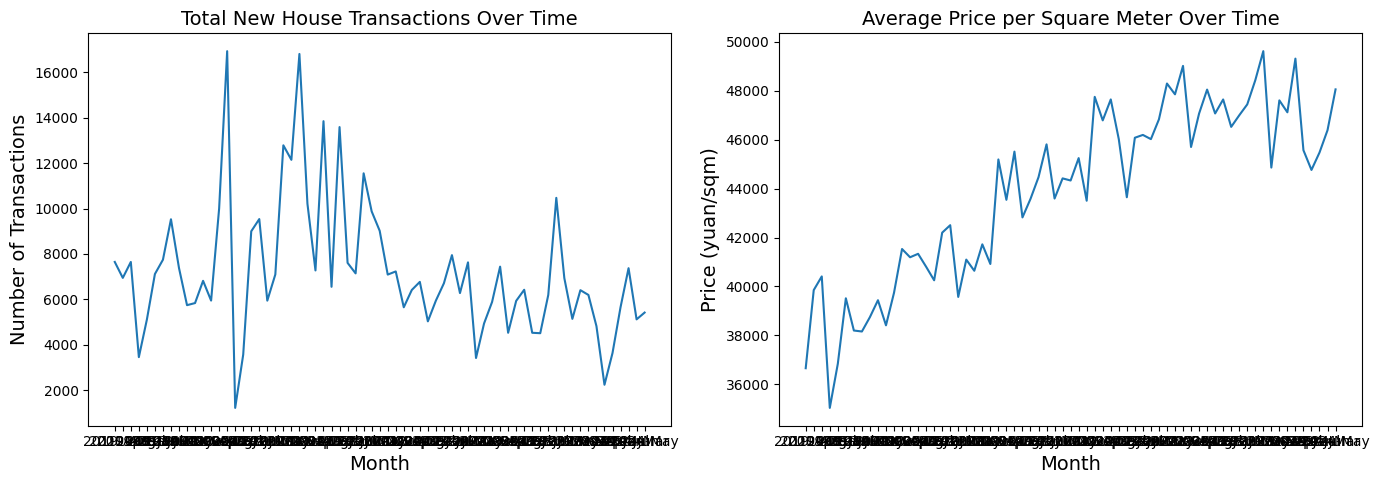

In [9]:
# Memory usage
print(f"\nMemory usage:\n{new_house_df.memory_usage(deep=True)}")

# Check for duplicates
duplicates = new_house_df.duplicated(subset=['month', 'sector']).sum()
print(f"\nDuplicate month-sector pairs: {duplicates}")


# Aggregate by month
monthly_stats = new_house_df.groupby('month').agg({
    'num_new_house_transactions': 'sum',
    'price_new_house_transactions': 'mean'
})
# Create subplots so `axes[0]` and `axes[1]` exist
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(monthly_stats.index, monthly_stats['num_new_house_transactions'])
axes[0].set_title('Total New House Transactions Over Time')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Number of Transactions')

axes[1].plot(monthly_stats.index, monthly_stats['price_new_house_transactions'])
axes[1].set_title('Average Price per Square Meter Over Time')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Price (yuan/sqm)')

plt.tight_layout()
plt.show()

## Setting the output paths and folders and creating standardized output

In [10]:
# Defining the output paths
OUTPUT_PATH = Path("/Users/nikola/Python/KaggleCompetition/output/08_EWGM_short")
IMAGES_PATH = OUTPUT_PATH / "images"
SUBMISSION_PATH = OUTPUT_PATH / "submissions"

# Create directories if they don't exist
OUTPUT_PATH.mkdir(parents=True, exist_ok=True)
IMAGES_PATH.mkdir(parents=True, exist_ok=True)
SUBMISSION_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    """Save a matplotlib figure to the images folder"""
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    print(f"Figure saved: {path}")

def save_submission(df, name="submission"):
    """Save a DataFrame as CSV for Kaggle submission"""
    from datetime import datetime
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"{name}_{timestamp}.csv"
    path = SUBMISSION_PATH / filename
    df.to_csv(path, index=False)
    print(f"Submission saved: {path}")
    return path